In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

60000

In [52]:

X_train[0].shape

(28, 28)

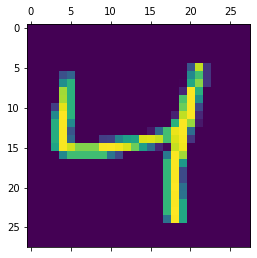

In [53]:

plt.matshow(X_train[2])

In [54]:
X_train = X_train/255
X_test = X_test/255

In [55]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) #make convert 28*28 array to single dim array having single column
X_test_flattened = X_test.reshape(len(X_test), 28*28) #make convert 28*28 array to single dim array having single column


X_train_flattened.shape

(60000, 784)

In [56]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 813us/step - loss: 0.4676 - accuracy: 0.8768
Epoch 2/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 730us/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 755us/step - loss: 0.2665 - accuracy: 0.9259


In [57]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 732us/step - loss: 0.2663 - accuracy: 0.9265


[0.266307532787323, 0.9265000224113464]

In [58]:
y_predicted = model.predict(X_test_flattened)

In [60]:
y_predicted[0]

array([1.7966539e-02, 3.2949680e-07, 6.9922864e-02, 9.5841181e-01,
       3.1854510e-03, 1.2065315e-01, 1.5948498e-06, 9.9982893e-01,
       9.5382452e-02, 6.7666650e-01], dtype=float32)

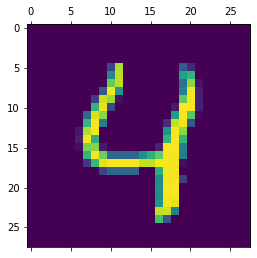

In [71]:
plt.matshow(X_test[4])


In [70]:
np.argmax(y_predicted[4])

4

In [72]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

[7, 2, 1, 0, 4]

In [76]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    6,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    8,  926,   16,    9,    5,   11,   12,   37,    3],
       [   1,    0,   21,  928,    2,   18,    2,   11,   21,    6],
       [   1,    1,    4,    1,  929,    0,   10,    4,   10,   22],
       [   8,    2,    4,   40,   12,  767,   11,    9,   33,    6],
       [  10,    3,    8,    1,    8,   13,  908,    2,    5,    0],
       [   1,    5,   24,    4,    8,    0,    0,  955,    2,   29],
       [   4,    6,    7,   24,    9,   19,    8,   13,  878,    6],
       [  10,    7,    1,   10,   40,    6,    0,   27,    8,  900]])>

Text(69.0, 0.5, 'Truth')

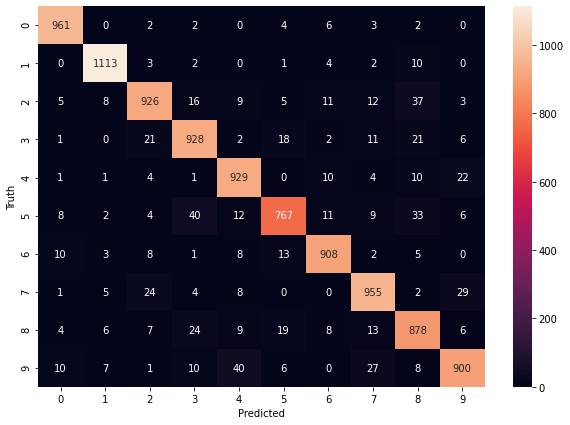

In [77]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1665/1875 [=========================>....] - ETA: 0s - loss: 0.2851 - accuracy: 0.9201

In [ ]:
model.evaluate(X_test_flattened, y_test)